<a href="https://colab.research.google.com/github/Venkata-Sai-Prakash-Yerramsetti/CMPE257-Fall23-Venkata-Sai-Prakash-Yerramsetti/blob/class-activities/Pla_Pocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive/


Text(0.5, 1.0, 'Data Samples')

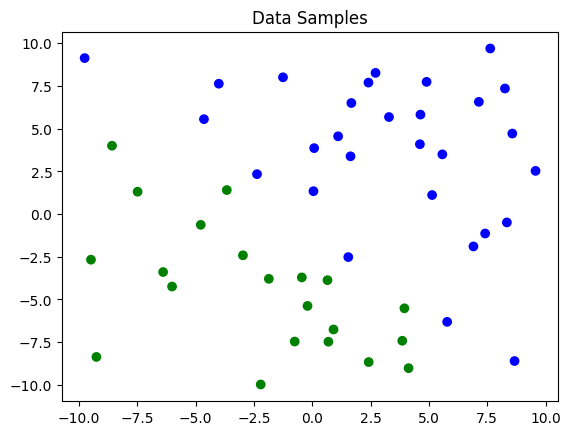

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')


data= pd.read_csv('/content/drive/MyDrive/datasets/synthetic_dataset.csv')

x1 = data['x1']
x2 = data['x2']
y = data['y']
colors = ['blue' if label == 1 else 'green' for label in y]

fig = plt.scatter(x1, x2, c=colors)
plt.title("Data Samples")

In [3]:
data['x0'] = 1
X = data[['x0', 'x1', 'x2']].values
y = data['y'].values
times, features = X.shape

def plaalgo(X, y, num_iter=times):

    weights = np.zeros(X.shape[1])
    for i in range(num_iter):
        misclass = 0
        for j in range(times):
            if y[j] * np.dot(X[j], weights) <= 0:
                weights += y[j] * X[j]
                misclass += 1
        if misclass == 0:
            break

        print(f"iteration:{i+1} , weights{weights}, Number of misclass: {misclass}")

    return weights, misclass

weights,misclass = plaalgo(X, y)

def compute(weights, X, y):
    predict = np.sign(np.dot(X, weights))
    accuracy = np.mean(predict == y)
    return accuracy
accuracy=compute(weights,X,y)


print(f"Best Weights: {weights}, Number of misclass: {misclass}")
print(f"Accuracy: {accuracy*100} %")


iteration:1 , weights[ 6.          8.15289571 18.17710968], Number of misclass: 10
iteration:2 , weights[ 9.          5.72231963 18.48106118], Number of misclass: 3
iteration:3 , weights[12.         15.25753228 15.61941417], Number of misclass: 5
iteration:4 , weights[14.          7.04547206 22.23435375], Number of misclass: 2
iteration:5 , weights[15.          7.41653362 24.84712185], Number of misclass: 3
iteration:6 , weights[15.         17.54321156 18.32532456], Number of misclass: 2
iteration:7 , weights[17.          9.33115134 24.94026414], Number of misclass: 2
iteration:8 , weights[18.          9.7022129  27.55303224], Number of misclass: 3
iteration:9 , weights[20.         15.85475859 23.85481227], Number of misclass: 4
iteration:10 , weights[23.         13.42418251 24.15876377], Number of misclass: 3
iteration:11 , weights[26.         10.99360643 24.46271527], Number of misclass: 3
iteration:12 , weights[27.         11.36466799 27.07548338], Number of misclass: 3
iteration:13

<ipython-input-5-8c6308800152>:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(x, y, Z, levels=[0], colors=boundary_line_color, linestyles='-', linewidth = 1)


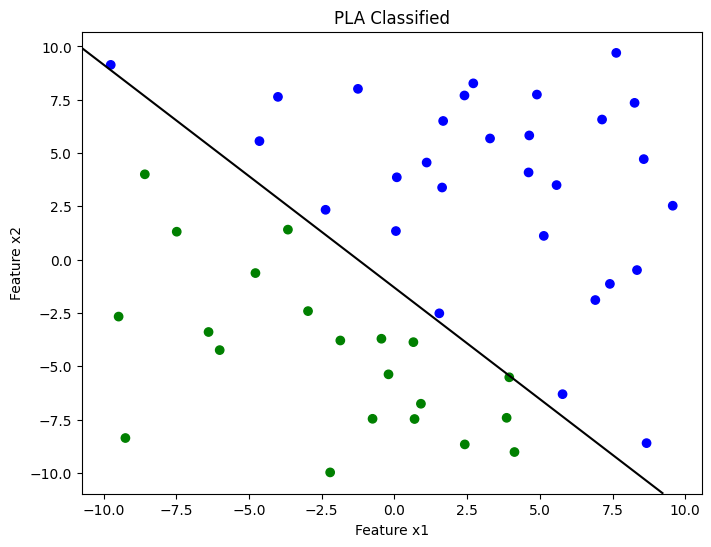

In [5]:
def plot(weights, title):
    x1 = data['x1']
    x2 = data['x2']
    y = data['y']
    plot_colors = ['green' if label == -1 else 'blue' for label in y]
    boundary_line_color = 'black'
    plt.figure(figsize=(8, 6))
    plt.scatter(x1, x2, c=plot_colors)
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    x, y = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    Z = np.dot(np.c_[np.ones_like(x.ravel()), x.ravel(), y.ravel()], weights)
    Z = Z.reshape(x.shape)
    plt.contour(x, y, Z, levels=[0], colors=boundary_line_color, linestyles='-', linewidth = 1)
    plt.title(title)
    plt.xlabel("Feature x1")
    plt.ylabel("Feature x2")
    plt.show()
plot(weights, "PLA Classified")


In [6]:
def find_the_value(x1,x2,m):
  m=list(m)
  value=m[0]+x1*m[1]+x2*m[2]
  if value>0:
    return 1
  else:
    return -1

w_vector=[1,1,1]

data['value']=data.apply(lambda x: find_the_value(x['x1'],x['x2'],w_vector),axis=1)
df_misclassified=data[data['y']!=data['value']]
print(len(df_misclassified))

0


In [7]:
def plot_pocket(data, weights, Algo):
    sl = -weights[1] / weights[2]
    inter = -weights[0] / weights[2]
    x_plane = np.linspace(data['x1'].min(), data['x1'].max(), 10)
    y_plane = sl * x_plane + inter

    plt.figure(figsize=(8, 6))

    # Plot points with different colors based on class labels
    plt.scatter(data['x1'][data['y'] == 1], data['x2'][data['y'] == 1], color='blue')
    plt.scatter(data['x1'][data['y'] == -1], data['x2'][data['y'] == -1], color='green')

    # Plot the decision boundary line in black
    plt.plot(x_plane, y_plane, color='black', linewidth=1)

    plt.title(f"{Algo} Output")
    plt.xlabel("Features of x1")
    plt.ylabel("Features of x2")
    plt.legend(loc='upper right')  # Add legend for class labels
    plt.show()

In [8]:
def pocket(data,weight_lis,max_trials=200):
  min_misclassification = 1000
  #intializing the weight vector
  w_vector=np.array(weight_lis)

  data['value']=data.apply(lambda x: find_the_value(x['x1'],x['x2'],w_vector),axis=1)
  data_misclass=data[data['y']!=data['value']]
  print(len(data_misclass))
  learning_rate = 0.01
  iteration = 1

  while len(data_misclass)!=0 and iteration<max_trials:

    for index,row in data_misclass.iterrows():
      X_vector = np.array([1,row['x1'],row['x2']])
      w_vector_temp=w_vector+learning_rate*(X_vector)*row['y']
      data['value']=data.apply(lambda x: find_the_value(x['x1'],x['x2'],w_vector_temp),axis=1)
      data_misclass_temp=data[data['y']!=data['value']]
      if len(data_misclass_temp)<min_misclassification:
        min_misclassification = len(data_misclass_temp)
        w_vector=w_vector_temp
    data['value']=data.apply(lambda x: find_the_value(x['x1'],x['x2'],w_vector),axis=1)
    data_misclass=data[data['y']!=data['value']]
    #print('missclassified points are {} for iteration {} with weights {}'.format(min_misclassification,iteration,list(w_vector)) )
    iteration+=1
  if min_misclassification==0:
    print('Pocket Converges after {} trials'.format(iteration))
  else:
    print('not converging even after {} trials'.format(iteration))
  return w_vector

4


not converging even after 200 trials


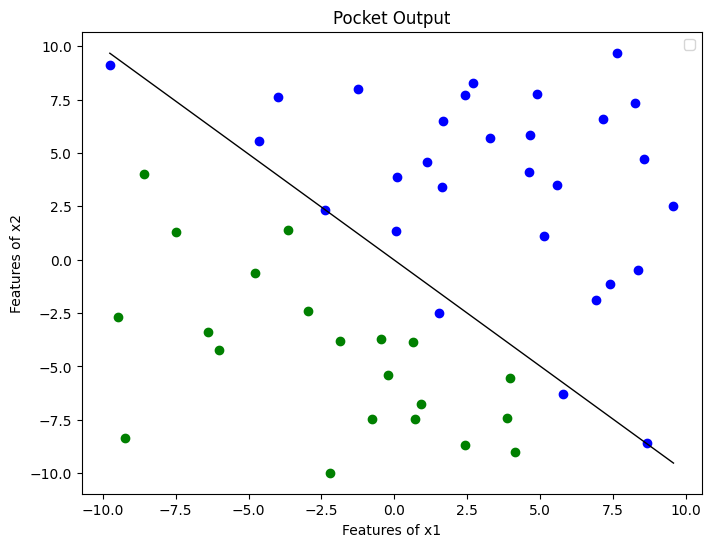

In [9]:
weights_list= pocket(data,[0,1,1],200)
plot_pocket(data,weights_list,'Pocket')